In [1]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
from svhn_utils import one_hot, pad_one_hots, shuffle
from training_utils import get_pred, accuracy, train_model

In [2]:
matplotlib.style.use("ggplot")
%matplotlib inline

In [4]:
train_mat = loadmat('D:/Data/SVHN/tensors2/train.mat')
test_mat = loadmat('D:/Data/SVHN/tensors2/test.mat')

train_y = train_mat['labels'].reshape(-1)
test_y = test_mat['labels'].reshape(-1)
train_files = train_mat['files']
test_files = test_mat['files']

In [6]:
train_x = train_mat['data'].astype('float32')
del train_mat
train_x = train_x / 255.0 - 0.5

In [5]:
test_x = test_mat['data'].astype('float32')
del test_mat
test_x = test_x / 255.0 - 0.5

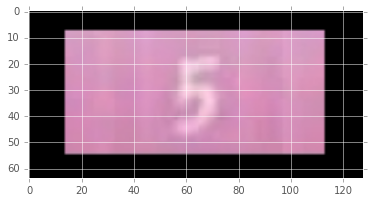

In [9]:
plt.imshow((test_x[0] + 0.5) * 255)

In [10]:
train_x, train_y = shuffle(train_x, train_y)
# test_x, test_y = shuffle(test_x, test_y)

In [11]:
train_y.shape

(33402,)

In [12]:
pd.Series([len(y.flatten()) for y in train_y]).value_counts()

2    18130
3     8691
1     5137
4     1434
5        9
6        1
dtype: int64

In [13]:
pd.Series([len(y.flatten()) for y in test_y]).value_counts()

2    8356
1    2483
3    2081
4     146
5       2
dtype: int64

In [14]:
train_y_lens = np.array([len(y.flatten()) for y in train_y])
train_y = train_y[train_y_lens <= 5] 
train_x = train_x[train_y_lens <= 5]

In [15]:
def format_labels(y):
    y = np.array([one_hot(_y.flatten()) for _y in y]).reshape([-1])
    return np.array([pad_one_hots(_y) for _y in y])
train_y = format_labels(train_y)
test_y = format_labels(test_y)

In [16]:
valid_x = train_x[:len(train_x)//4]
valid_y = train_y[:len(train_y)//4]
train_x = train_x[len(train_x)//4:]
train_y = train_y[len(train_y)//4:]

In [39]:
import models
import imp
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

# Trying deeper model v2

In [51]:
deeper_model_v7 = models.make_deeper_model_v7(train_x.shape)

In [52]:
[layer.output_shape for layer in deeper_model_v7.layers]

[(None, 64, 128, 3),
 (None, 64, 128, 5),
 (None, 64, 128, 25),
 (None, 64, 128, 50),
 (None, 32, 64, 50),
 (None, 32, 64, 50),
 (None, 32, 64, 100),
 (None, 32, 64, 200),
 (None, 16, 32, 200),
 (None, 16, 32, 200),
 (None, 16, 32, 200),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 100),
 (None, 8, 16, 50),
 (None, 4, 8, 50),
 (None, 1600),
 (None, 200),
 (None, 200),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

154.74 minutes for epoch
capture_performance2(): valid accuracy 0.681437125748503
Epoch 29
Validation accuracy 68.144%
Mean batch dig loss 0.158
Valid dig loss 0.502


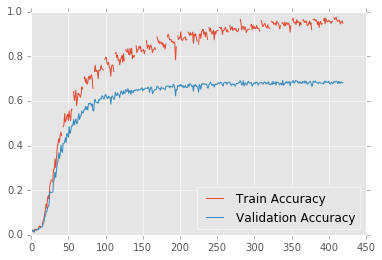

5313.94 minutes total elapsed


In [53]:
deeper_model_v7, train_acc, valid_acc = train_model(deeper_model_v7, train_x, train_y, 
                                                    valid_x, valid_y, n_epochs=30, 
                                                    batch_size=20)

# Trying to fine tune VGG16

In [58]:
vgg_model_v = models.make_vgg_model_v1(train_x[0].shape)

In [59]:
[layer.output_shape for layer in vgg_model_v1.layers]

[(None, 64, 128, 3),
 (None, 64, 128, 64),
 (None, 64, 128, 64),
 (None, 32, 64, 64),
 (None, 32, 64, 128),
 (None, 32, 64, 128),
 (None, 16, 32, 128),
 (None, 16, 32, 256),
 (None, 16, 32, 256),
 (None, 16, 32, 256),
 (None, 8, 16, 256),
 (None, 8, 16, 512),
 (None, 8, 16, 512),
 (None, 8, 16, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 2, 4, 512),
 (None, 4096),
 (None, 1000),
 (None, 1000),
 (None, 1000),
 (None, 1000),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

In [60]:
vgg_model_v1, train_acc, valid_acc = train_model(vgg_model_v1, train_x, train_y, 
                                                 valid_x, valid_y, n_epochs=50, 
                                                 batch_size=20)

capture_performance2(): valid accuracy 0.018562874251497007
capture_performance2(): valid accuracy 0.020958083832335328
capture_performance2(): valid accuracy 0.020958083832335328


KeyboardInterrupt: 

# Trying to fine tune VGG16 with different optimizer...

In [76]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [77]:
vgg_model_v2 = models.make_vgg_model_v2(train_x[0].shape)

In [78]:
[layer.output_shape for layer in vgg_model_v2.layers]

[(None, 64, 128, 3),
 (None, 64, 128, 64),
 (None, 64, 128, 64),
 (None, 32, 64, 64),
 (None, 32, 64, 128),
 (None, 32, 64, 128),
 (None, 16, 32, 128),
 (None, 16, 32, 256),
 (None, 16, 32, 256),
 (None, 16, 32, 256),
 (None, 8, 16, 256),
 (None, 8, 16, 512),
 (None, 8, 16, 512),
 (None, 8, 16, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 2, 4, 512),
 (None, 4096),
 (None, 1000),
 (None, 1000),
 (None, 1000),
 (None, 1000),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

In [79]:
vgg_model_v2, train_acc3, valid_acc3 = train_model(vgg_model_v2, train_x, train_y, 
                                                 valid_x, valid_y, n_epochs=30, 
                                                 batch_size=20)

232.80 minutes for epoch
capture_performance2(): valid accuracy 0.7589221556886228


KeyboardInterrupt: 

In [139]:
valid_pred = vgg_model_v2.predict(valid_x)

In [119]:
vgg_model_v2.evaluate(valid_x, valid_y)

8350/8350 [==============================] - 546s   


0.40935863082280416

In [138]:
vgg_model_v2.evaluate(test_x, test_y)

13068/13068 [==============================] - 845s   


0.58902585969848442

In [81]:
test_pred = vgg_model_v2.predict(test_x)
test_pred

array([[[  1.65484525e-04,   4.32174929e-05,   1.19980960e-03, ...,
           1.29127056e-05,   3.22125720e-06,   6.78277938e-16],
        [  1.69827599e-05,   8.08830646e-06,   6.62804814e-06, ...,
           2.53292995e-07,   9.38973017e-07,   9.99875903e-01],
        [  4.92190520e-06,   1.90811491e-07,   4.11318979e-06, ...,
           4.86324325e-07,   1.72360888e-06,   9.99971628e-01],
        [  2.99932701e-08,   2.79480581e-08,   1.31150415e-08, ...,
           6.67214195e-08,   1.01306391e-07,   9.99999523e-01],
        [  3.56076957e-13,   5.63361666e-16,   1.66652456e-11, ...,
           1.33327666e-15,   1.19878125e-14,   1.00000000e+00]],

       [[  9.99894261e-01,   9.49626246e-06,   3.65528808e-06, ...,
           4.58289196e-06,   2.15554473e-06,   5.12176842e-16],
        [  7.90255763e-06,   1.71381458e-07,   3.47733078e-07, ...,
           4.25681918e-07,   3.07416158e-05,   1.30892251e-04],
        [  5.57080247e-02,   6.71701459e-03,   3.78666283e-03, ...,
      

# on a per character basis, that's still not very good...

In [86]:
np.mean((test_pred.argmax(axis=-1) == test_y.argmax(axis=-1)))

0.89003673094582181

# How is the accuracy so low??? We had 76% on the validation data

In [90]:
np.mean((test_pred.argmax(axis=-1) == test_y.argmax(axis=-1)).all(axis=1))

0.64952555861646766

In [92]:
where_correct = (test_pred.argmax(axis=-1) == test_y.argmax(axis=-1)).all(axis=-1)

# it's not like necessarily we're getting longer numbers wrong...

In [95]:
np.mean((test_y.argmax(axis=-1)[where_correct] == 10).sum(axis=1))

3.0361687087653157

In [96]:
np.mean((test_y.argmax(axis=-1)[~where_correct] == 10).sum(axis=1))

2.9556768558951965

In [131]:
def format_num(vec):
    nums = np.argmax(vec, axis=-1)
    return ''.join([str(x+1) for x in nums if x != 10])
format_num([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

'1234'

In [108]:
wrong_x = test_x[~where_correct]
wrong_y = test_y[~where_correct]
wrong_pred = test_pred[~where_correct]

In [109]:
right_x = test_x[where_correct]
right_y = test_y[where_correct]
right_pred = test_pred[where_correct]

In [111]:
import time
from IPython.display import clear_output

In [132]:
np.mean(test_y, axis=(0,1))

array([ 0.07803796,  0.06349862,  0.04410774,  0.03861341,  0.03648607,
        0.03025712,  0.03089991,  0.02540557,  0.02441077,  0.02669115,
        0.60159167])

In [133]:
np.mean(test_pred, axis=(0,1))

array([ 0.08070039,  0.05438516,  0.04025048,  0.0491432 ,  0.03430918,
        0.03382224,  0.03164384,  0.03045452,  0.02834231,  0.0284699 ,
        0.58847088], dtype=float32)

In [127]:
np.argmax([0, 1, 0])

1

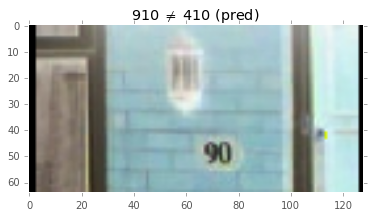

In [136]:
plt.imshow(255*(wrong_x[10] + 0.5))
plt.title('{} $\\neq$ {} (pred)'.format(format_num(wrong_y[10]), format_num(wrong_pred[10])))
plt.grid(False)
plt.show()

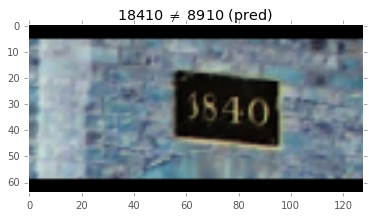

KeyboardInterrupt: 

In [134]:
for i in range(20):
    plt.imshow(255*(wrong_x[i] + 0.5))
    plt.title('{} $\\neq$ {} (pred)'.format(format_num(wrong_y[i]), format_num(wrong_pred[i])))
    plt.grid(False)
    plt.show()
    
    time.sleep(2)
    plt.close('all')
    clear_output()

In [118]:
for i in range(20):
    plt.imshow(255*(right_x[i] + 0.5))
    plt.title('{} = {} (pred)'.format(format_num(right_y[i]), format_num(right_pred[i])))
    plt.grid(False)
    plt.show()
    
    time.sleep(2)
    plt.close('all')
    clear_output()

# Trying to use the VGG16 architecture but build from scratch

In [144]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [145]:
vgg_model_v3 = models.make_vgg_model_v3(train_x[0].shape)

In [146]:
[layer.output_shape for layer in vgg_model_v3.layers]

[(None, 64, 128, 3),
 (None, 64, 128, 64),
 (None, 64, 128, 64),
 (None, 32, 64, 64),
 (None, 32, 64, 128),
 (None, 32, 64, 128),
 (None, 16, 32, 128),
 (None, 16, 32, 256),
 (None, 16, 32, 256),
 (None, 16, 32, 256),
 (None, 8, 16, 256),
 (None, 8, 16, 512),
 (None, 8, 16, 512),
 (None, 8, 16, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 2, 4, 512),
 (None, 4096),
 (None, 1000),
 (None, 1000),
 (None, 1000),
 (None, 1000),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

In [147]:
vgg_model_v3, train_acc4, valid_acc4 = train_model(vgg_model_v3, train_x, train_y, 
                                                 valid_x, valid_y, n_epochs=30, 
                                                 batch_size=20)

capture_performance2(): valid accuracy 0.002155688622754491
capture_performance2(): valid accuracy 0.01532934131736527
capture_performance2(): valid accuracy 0.020958083832335328
capture_performance2(): valid accuracy 0.020958083832335328
capture_performance2(): valid accuracy 0.020958083832335328
capture_performance2(): valid accuracy 0.020958083832335328
capture_performance2(): valid accuracy 0.020958083832335328
capture_performance2(): valid accuracy 0.020958083832335328
capture_performance2(): valid accuracy 0.020958083832335328


KeyboardInterrupt: 

In [ ]:
import 

# Trying deeper model v3

In [149]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [151]:
deeper_model_v9 = models.make_deeper_model_v9(train_x.shape)

In [152]:
[layer.output_shape for layer in deeper_model_v9.layers]

[(None, 64, 128, 3),
 (None, 64, 128, 50),
 (None, 64, 128, 100),
 (None, 32, 64, 100),
 (None, 32, 64, 100),
 (None, 32, 64, 200),
 (None, 16, 32, 200),
 (None, 16, 32, 200),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 200),
 (None, 2, 4, 200),
 (None, 1600),
 (None, 800),
 (None, 800),
 (None, 800),
 (None, 800),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

In [ ]:
deeper_model_v9, train_acc6, valid_acc6 = train_model(deeper_model_v9, train_x, train_y, 
                                                      valid_x, valid_y, n_epochs=30, 
                                                      batch_size=20)